<a href="https://colab.research.google.com/github/bbutka/CEC595/blob/main/L07a_2_Arduino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook uses a deep learning image classification model, VGG16, to find similar images among a set of photos of Arduinos

Below we import the libraries we'll be using.

In [1]:

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.applications import vgg16
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np 

We'll download the model VGG16 that has already been trained on the dataset ImageNet.

In [3]:
model = vgg16.VGG16(weights='imagenet', include_top=True)

553467904/553467096 [==============================] - 4s 0us/step


Next, we'll remove the last two layers of the model.

In [5]:
model2 = Model(model.input, model.layers[-2].output)

We'll download Arduino images below

In [6]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1e7WmmVCF9ByOdEkqO0-ft3OWJoD7XHdU' -O IMAGES.zip
!unzip IMAGES.zip 

--2021-03-01 00:22:43--  https://docs.google.com/uc?export=download&id=1e7WmmVCF9ByOdEkqO0-ft3OWJoD7XHdU
Resolving docs.google.com (docs.google.com)... 64.233.191.138, 64.233.191.101, 64.233.191.113, ...
Connecting to docs.google.com (docs.google.com)|64.233.191.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2d0pgbdsigjdq0mhpr1pvha4vs4ifjct/1614558150000/08914542393121785554/*/1e7WmmVCF9ByOdEkqO0-ft3OWJoD7XHdU?e=download [following]
--2021-03-01 00:22:44--  https://doc-0s-2c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/2d0pgbdsigjdq0mhpr1pvha4vs4ifjct/1614558150000/08914542393121785554/*/1e7WmmVCF9ByOdEkqO0-ft3OWJoD7XHdU?e=download
Resolving doc-0s-2c-docs.googleusercontent.com (doc-0s-2c-docs.googleusercontent.com)... 142.250.128.132, 2607:f8b0:4001:c32::84
Connecting to doc-0s-2c-docs.googleusercontent.com (doc-0s-2c-

We will then load and process the images so that we can input them into our model and use the predictions from the model to find pairs of images that are most similar to each other according to our model.

0 5


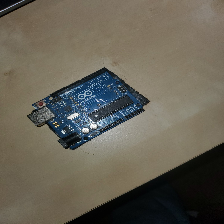

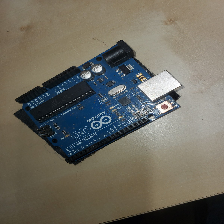

1 2


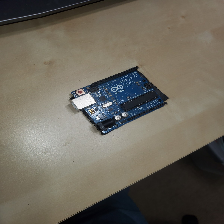

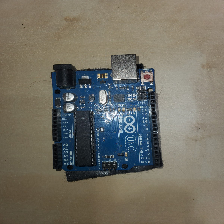

2 8


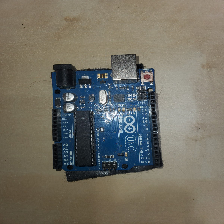

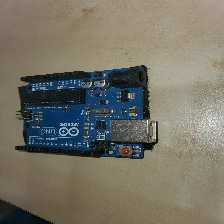

3 2


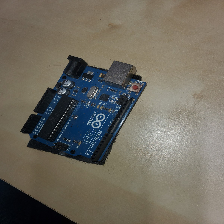

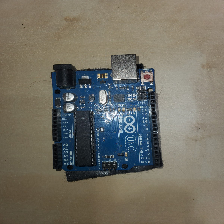

4 2


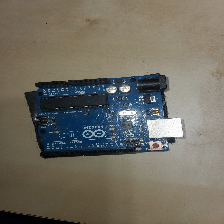

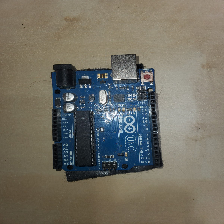

5 2


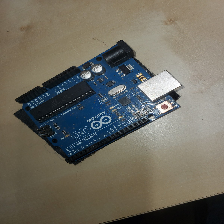

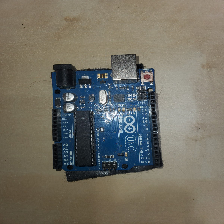

6 2


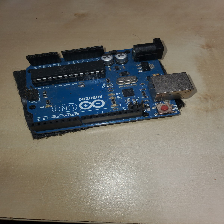

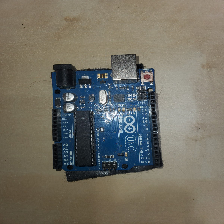

7 8


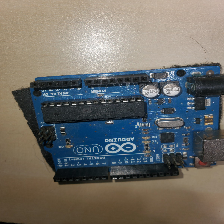

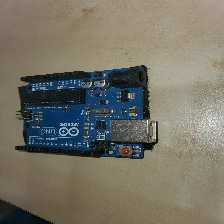

8 2


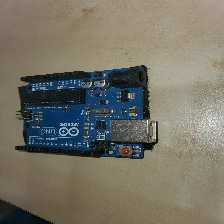

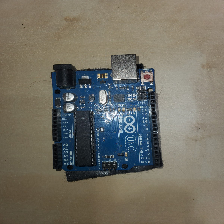

9 4


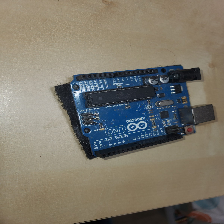

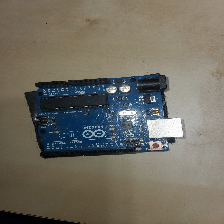

10 12


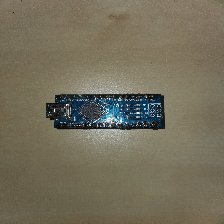

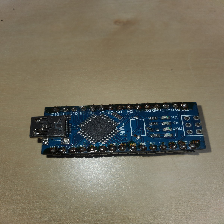

11 12


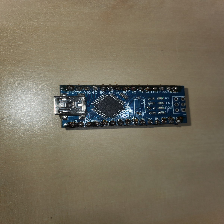

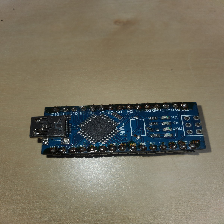

12 13


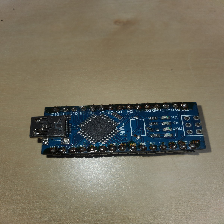

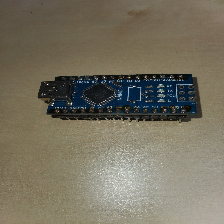

13 12


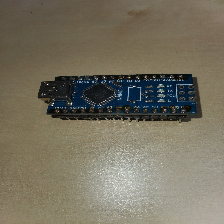

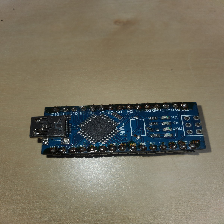

14 4


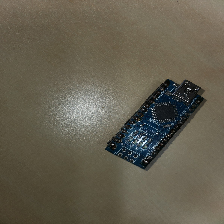

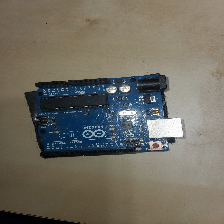

15 12


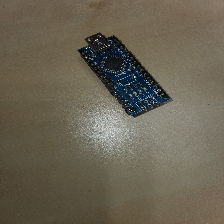

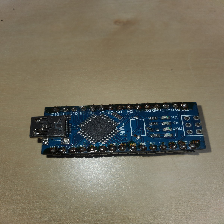

16 12


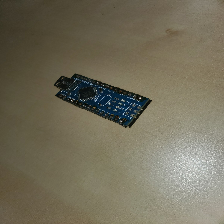

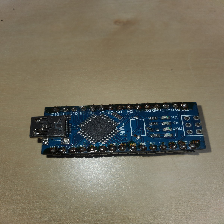

17 11


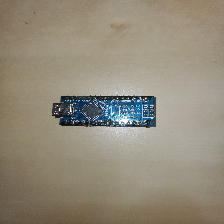

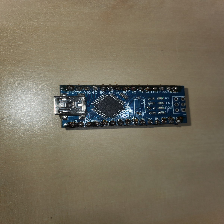

18 12


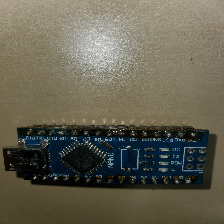

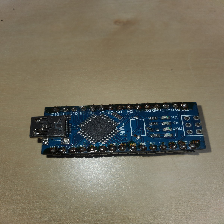

19 12


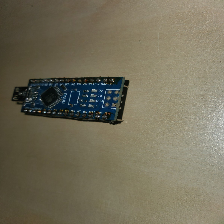

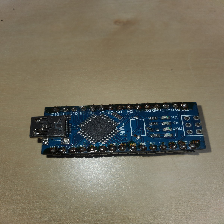

In [7]:
# get images
from PIL import Image
from IPython.display import display
         
dat = []
labs = []
imgs = []
imgflist = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10",
           "N1", "N2", "N3", "N4", "N5", "N6", "N7", "N8", "N9", "N10"]
for imgf in imgflist:
    img = image.load_img(imgf+".jpg", target_size=(224,224))
    imgs.append(img)
    img_arr = np.expand_dims(image.img_to_array(img), axis=0)
    x = preprocess_input(img_arr)
    preds = model2.predict(x)
    dat.append(preds[0])
for i in range(len(dat)):
  i1 = dat[i]
  bestmatch, bestsim = -1, 0
  for j in range(len(dat)):
    i2 = dat[j]
    sim = i1 @ i2   #Dot product
    if sim > bestsim and i != j: bestmatch, bestsim = j, sim
  print(i,bestmatch)
  display(imgs[i], imgs[bestmatch])